# Content-based-recommender system project

As part of a project work for data science workflow, We have built a recommedation system that is content based.
The datasets used for this task is TMDB-5000 dataset. As content based approach, we work with overview column of each movie to compute the pairwise similarity between them. 

The first step would of course be to represent each overview as mathematical quantities. To put in another way, we should find the vector representation for each document(in our case the overview). I am using the TF-IDFVectorizer technique to accomplish the above. 

Additionally, We came across CountVectorizer which serves similar purpose as TF-IDFVectorizer.
I have used TF-IDFVectorizer in conjunction with sigmoid_kernel of sklearn library and CountVectorizer with cosine similarity score.


Having the vector representations in hand, we move towards forming the cosine similarity score between all the items(movies in our case). Further, sorting the scores and taking the top 10 similar movie to a given movie.

In [1]:
# importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# read preprocessed dataset
data = pd.read_csv('Datasets/Datasets/clean_data.csv')
data.head(3)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

In [4]:
data.dtypes

Unnamed: 0                int64
budget                    int64
genres                   object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
tagline                  object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

The 'overview' feature is a good option to consider for a TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer model in a content-based recommendation system for several reasons:

1. Rich Semantic Information:
The 'overview' of a movie typically contains a concise summary of the plot, themes, and key elements of the story. This rich semantic information helps capture the essence of the movie, which is crucial for understanding and comparing the content of different movies.
2. High Discriminative Power:
Overviews often include specific terms and phrases unique to the movie's plot and genre. TF-IDF helps in highlighting these unique terms by assigning higher weights to terms that are important in a specific document (movie overview) but less common across all documents (all movie overviews). This discriminative power is useful for distinguishing between movies based on their content.

3. Reduced Sparsity:
Unlike metadata features such as genre or director, which can be quite sparse and binary, textual overviews provide a dense source of information. Every movie will have an overview, and these overviews will typically be a few sentences long, ensuring that the resulting TF-IDF matrix is dense enough for meaningful comparisons.

4. Captures Context and Subtleties:
Textual descriptions can capture nuances and context that are not easily represented by other features. For example, two movies might share the same genre but differ significantly in their plots. Overviews can highlight these differences, enabling the recommendation system to make more precise suggestions.

5. Flexibility and Generalization:
Using textual data like overviews allows the recommendation system to generalize better to new or less popular movies. While other features like user ratings or watch history might be sparse for new releases, the overview provides immediate, rich content for the model to analyze and use for recommendations.

In [5]:
# our focus will the overview feature
data['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [6]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [7]:
# finding any missing value in the overview feature
data['overview'].isnull().sum()

3

In [8]:
# Removing the missing values from overview column ------------
data['overview'] = data['overview'].fillna('')

# Some visualization of our data
After checking dataset, I thought it would be good idea to visualize count of movies depending on runtime.
Also a scatter plot for budget and revenue of movies

Text(0.5, 1.0, 'Movie runtime histogram')

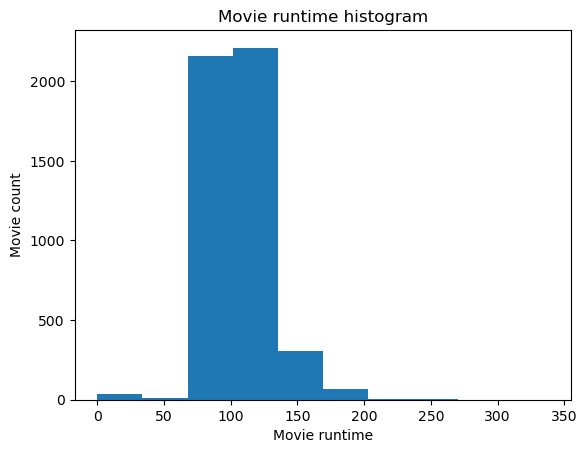

In [9]:
plt.hist(data['runtime'])
plt.ylabel('Movie count')
plt.xlabel('Movie runtime')
plt.title('Movie runtime histogram')

<Axes: xlabel='budget', ylabel='revenue'>

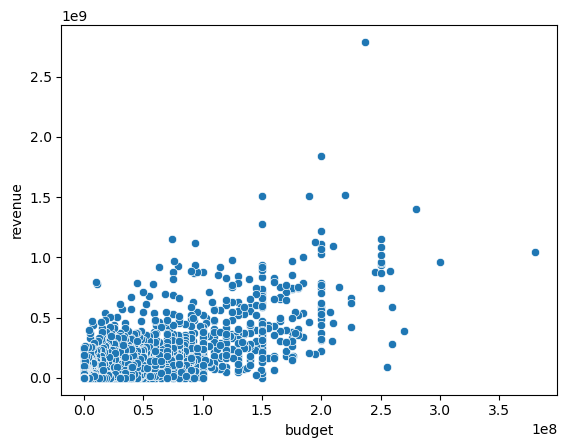

In [10]:
import seaborn as sns
sns.scatterplot(x=data['budget'], y=data['revenue'])

The above scatter plot shows correlation between budget and revenue features. A positive correlation can be seen.

## Implementation of TF-IDF with Overviews:
Here’s a brief overview of implementation of TF-IDF Vectorizer using the 'overview' feature:

Extract Overviews: Collect the overview text for each movie in your dataset.

Preprocess Text: Clean the text data by removing stop words, punctuation, and performing other text preprocessing steps.

In [11]:
# applying TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

The following code initializes a TfidfVectorizer object in the scikit-learn library, which is used to convert a collection of raw text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. This matrix can then be used as input for various machine learning algorithms. Here's a breakdown of the parameters used in the TfidfVectorizer initialization:

min_df=3: This parameter specifies that terms must appear in at least 3 documents to be included in the vocabulary. Terms that appear in fewer than 3 documents are ignored. This helps in reducing noise by eliminating rare terms.

max_features=None: This parameter means that there is no limit on the number of features (terms) to be extracted. All terms that meet the other criteria will be included in the vocabulary.

ngram_range=(1,3): This parameter specifies the range of n-values for different n-grams to be extracted. Here, it means that unigrams (single words), bigrams (pairs of consecutive words), and trigrams (triplets of consecutive words) will be considered.

stop_words='english': This parameter indicates that English stop words (common words that are usually removed from text data because they carry little meaningful information, like "the", "and", "is") will be excluded from the feature set. The stop_words parameter can take a list of words to be considered as stop words, but by setting it to 'english', it uses a built-in list of English stop words provided by scikit-learn.

In [12]:
tfv = TfidfVectorizer(min_df=3, max_features=None, ngram_range=(1,3), stop_words='english')

In the following cell we convert the text in the overview column into a numerical matrix suitable for our task

In [13]:
tfv_matrix = tfv.fit_transform(data['overview'])

In [14]:
# we will get a sparse matrix
tfv_matrix

<4803x9919 sparse matrix of type '<class 'numpy.float64'>'
	with 121480 stored elements in Compressed Sparse Row format>

In [15]:
tfv_matrix.shape

(4803, 9919)

In [16]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [17]:
# Having a look at the vector representation of first movie overview
tfv_matrix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
# Taking transpose of first review
tfv_matrix[0].T.toarray()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [19]:
# saving the whole matrix in X
X = tfv_matrix.toarray()

In [20]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df2 = pd.DataFrame(X)

In [22]:
data['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [23]:
# applying sigmoid 
from sklearn.metrics.pairwise import sigmoid_kernel

In [24]:
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [25]:
sig[0]

array([0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [26]:
indices = data.index
indices

RangeIndex(start=0, stop=4803, step=1)

In [27]:
title = data['original_title']

In [28]:
title[4802]

'My Date with Drew'

In [29]:
indices = pd.Series(data.index, index=data['original_title'])
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [30]:
indices['Avatar']

0

In [31]:
sig[0]

array([0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [32]:
# Define a function that makes recommendations
def give_rec(title, model):
    # Find the index of the movie title
    idx = indices[title]
    
    # Get similarity scores for the movie with the given index
    model_scores = list(enumerate(list(model[indices[idx]])))
    
    # Sort the scores in descending order
    model_scores = sorted(model_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 10 scores (excluding the first one which is the movie itself)
    model_scores = model_scores[1:11]
    
    # Get the indices of the top 10 similar movies
    movie_indices = [index[0] for index in model_scores]
    
    # Return the original titles of the top 10 similar movies
    return data['original_title'].iloc[movie_indices]


In [33]:
# call the function
give_rec('Avatar', sig)

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_66822/1622544881.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_scores = list(enumerate(list(model[indices[idx]])))


1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
570                           Ransom
Name: original_title, dtype: object

In [34]:
data.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [35]:
data['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [36]:
# the above data is unstructured - Thinking to make it better
eval(data['crew'][0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [37]:
from ast import literal_eval

In [38]:
# important features
features = ['cast', 'crew', 'keywords', 'genres']

In [39]:
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

In [40]:
data['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [41]:
data[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [42]:
data['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

### Feature Extraction

In [43]:
def get_director(x):
    # Iterate over the list of dictionaries in x
    for i in x:
        # Check if the job title is 'Director'
        if i['job'] == 'Director':
            # Return the director's name, with leading and trailing whitespace removed
            return i['name'].strip()
    else:
        # If no director is found, return NaN (Not a Number)
        return np.nan

In [44]:
# call the above function
get_director(data['crew'][0])

'James Cameron'

In [45]:
data['director'] = data['crew'].apply(get_director)

In [46]:
data['director'].shape

(4803,)

In [47]:
data['director'].isnull().sum()

30

In [48]:
data['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [49]:
def get_list(x):
    names = [i['name'] for i in x if type(x) == list]
    if len(names) > 3:
        return names[0:3]
    else:
        return names

In [50]:
get_list(data['crew'][0])

['Stephen E. Rivkin', 'Rick Carter', 'Christopher Boyes']

In [51]:
df2 = data.copy()

In [52]:
for feature in features:
    data[feature] = data[feature].apply(get_list)

In [53]:
data[features]

,cast,crew,keywords,genres
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Stephen E. Rivkin, Rick Carter, Christopher B...","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Thomas Newman, Sam Mendes, Anna Pinnock]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,"[Christian Bale, Michael Caine, Gary Oldman]","[Hans Zimmer, Charles Roven, Christopher Nolan]","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Andrew Stanton, Andrew Stanton, John Lasseter]","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
...,...,...,...,...
4798,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Robert Rodriguez, Robert Rodriguez, Robert Ro...","[united states–mexico barrier, legs, arms]","[Action, Crime, Thriller]"
4799,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[Edward Burns, Edward Burns, Edward Burns]",[],"[Comedy, Romance]"
4800,"[Eric Mabius, Kristin Booth, Crystal Lowe]","[Carla Hetland, Harvey Kahn, Adam Sliwinski]","[date, love at first sight, narration]","[Comedy, Drama, Romance]"
4801,"[Daniel Henney, Eliza Coupe, Bill Paxton]","[Daniel Hsia, Daniel Hsia]",[],[]


In [54]:
df2[features]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...,...,...
4798,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[{'id': 5616, 'name': 'united states–mexico ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",[],"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[]


In [55]:
# dropiing some missing values
data.dropna(subset='director', inplace=True)

In [56]:
data.isnull().sum()

Unnamed: 0                0
budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
release_date              0
revenue                   0
runtime                   2
spoken_languages          0
tagline                 822
vote_average              0
vote_count                0
cast                      0
crew                      0
director                  0
dtype: int64

At this step we do some feature engineering. We combine the information from multiple features (keywords, cast, director, genres) and put it in a new column to later use it for our model


In [57]:
data['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4773, dtype: object

In [58]:
type(' '.join(data['crew'][0]))

str

In [59]:
def create_feature(row):
    return ' '.join(row['keywords']) + ' '.join(row['cast']) + ' ' + row['director'] + ' '.join(row['genres'])

In [60]:
data['important_feature'] = data.apply(create_feature, axis=1)

In [61]:
data.head(2)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,director,important_feature
0,0,237000000,"[Action, Adventure, Fantasy]",19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Stephen E. Rivkin, Rick Carter, Christopher B...",James Cameron,culture clash future space warSam Worthington ...
1,1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",Gore Verbinski,ocean drug abuse exotic islandJohnny Depp Orla...


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
count = CountVectorizer(stop_words='english')

In [64]:
count_matrix = count.fit_transform(data['important_feature'])

In [65]:
count_matrix

<4773x16224 sparse matrix of type '<class 'numpy.int64'>'
	with 57930 stored elements in Compressed Sparse Row format>

In [66]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Let's recommend movies

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [69]:
cosine_sim2[0]

array([1.        , 0.07142857, 0.07142857, ..., 0.        , 0.        ,
       0.        ])

In [70]:
data['original_title'][6]

'Tangled'

# Comparing the results 
Following recommendations are made using two different models.
Looking at the results we can say that the recommendations based on cosine similarity along with the newly extracted features (combination of multiple features) performs better as the recommendation result is closer to the movie given to the function.


In [71]:
give_rec('The Godfather', cosine_sim2)

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_66822/1622544881.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_scores = list(enumerate(list(model[indices[idx]])))


2731     The Godfather: Part II
1525             Apocalypse Now
867     The Godfather: Part III
1209              The Rainmaker
4147           Small Apartments
2649          The Son of No One
1024                 Dick Tracy
2218             Death Sentence
2674             Stomp the Yard
512                      Wanted
Name: original_title, dtype: object

In [72]:
give_rec('The Godfather', sig)

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_66822/1622544881.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_scores = list(enumerate(list(model[indices[idx]])))


2731                             The Godfather: Part II
1873                                         Blood Ties
3730                                              Cargo
867                             The Godfather: Part III
3623                                               Made
3963                                 They Came Together
2464                             The Master of Disguise
2973    For Greater Glory - The True Story of Cristiada
2389                                        Renaissance
1475                                  Playing for Keeps
Name: original_title, dtype: object